# Estación Plaza Castilla

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../data/df_50.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,54.290323
2013-02-01,45.419355
2013-03-01,40.516129
2013-04-01,34.838710
2013-05-01,35.096774


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

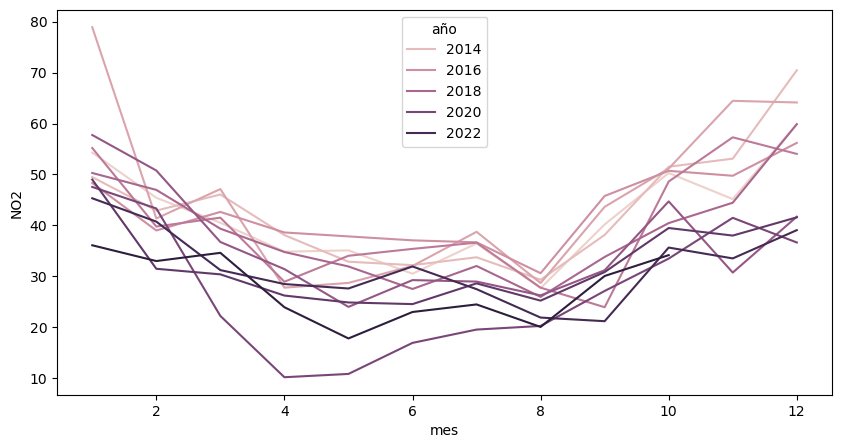

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

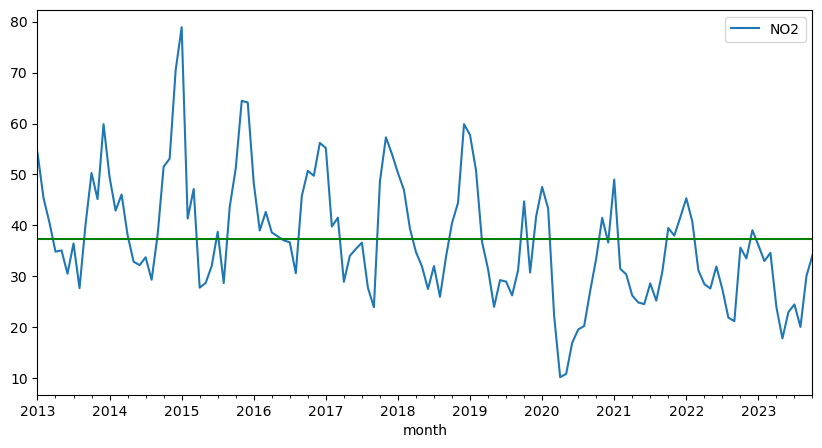

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

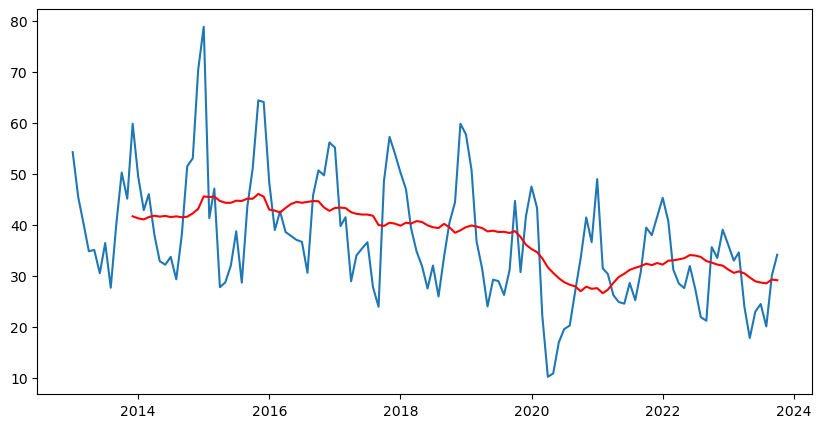

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

### Test de Fuller

In [11]:
res = adfuller(df["NO2"])
res

(-0.46595693860402887,
 0.8984903212468736,
 11,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 780.622248247229)

In [12]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -0.46595693860402887
p-value 0.8984903212468736
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [13]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 1.0
1 mes Lag, 0.7266791847365822
2 mes Lag, 0.4675534785951964
3 mes Lag, 0.19605257912445478
4 mes Lag, -0.05411786220111848
5 mes Lag, -0.21003095848671038
6 mes Lag, -0.23761706549996198
7 mes Lag, -0.2356242820168882
8 mes Lag, -0.05161071840661186
9 mes Lag, 0.21435640636362585
10 mes Lag, 0.4532549029190686
11 mes Lag, 0.6539105160836354
12 mes Lag, 0.7597055616541317
13 mes Lag, 0.633705512264369
14 mes Lag, 0.3899083316922654
15 mes Lag, 0.13727759215507132
16 mes Lag, -0.1556646888920466
17 mes Lag, -0.2926014783767325
18 mes Lag, -0.29785415378095365
19 mes Lag, -0.2630206756074485
20 mes Lag, -0.09856858783148599
21 mes Lag, 0.13090678462912583
22 mes Lag, 0.3396198787021433
23 mes Lag, 0.5943113757404315
24 mes Lag, 0.7288145027843359
25 mes Lag, 0.5856654914200252
26 mes Lag, 0.3900807588372408
27 mes Lag, 0.12952428466603916
28 mes Lag, -0.11320724420951389
29 mes Lag, -0.28034610914762004
30 mes Lag, -0.3206827132647046
31 mes Lag, -0.2799005677295864
32 mes 

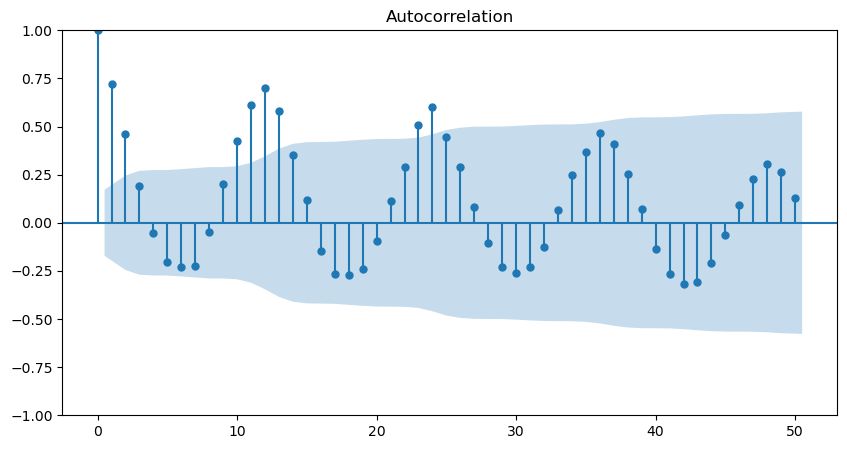

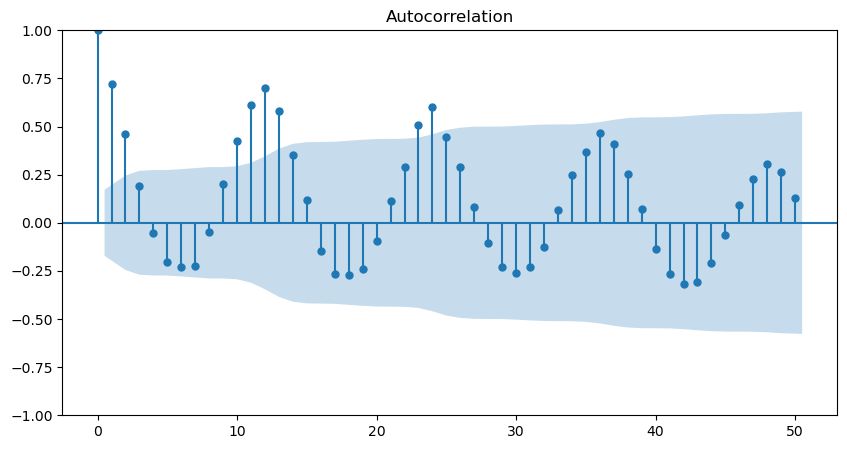

In [14]:
plot_acf(df, lags = 50)

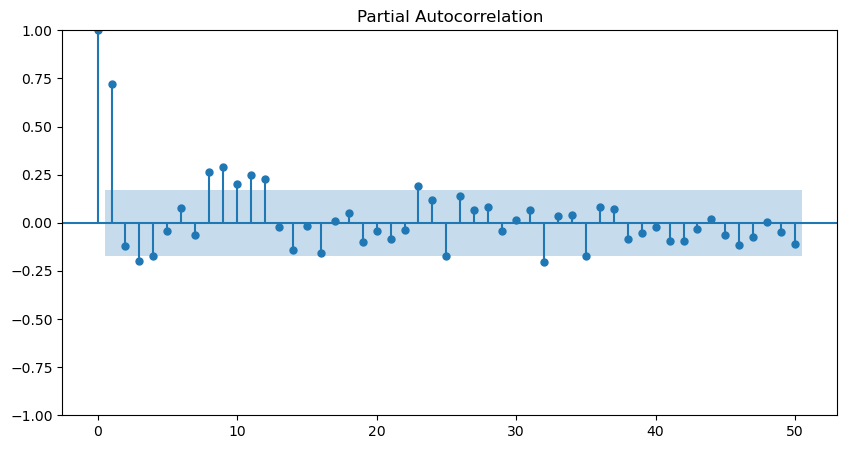

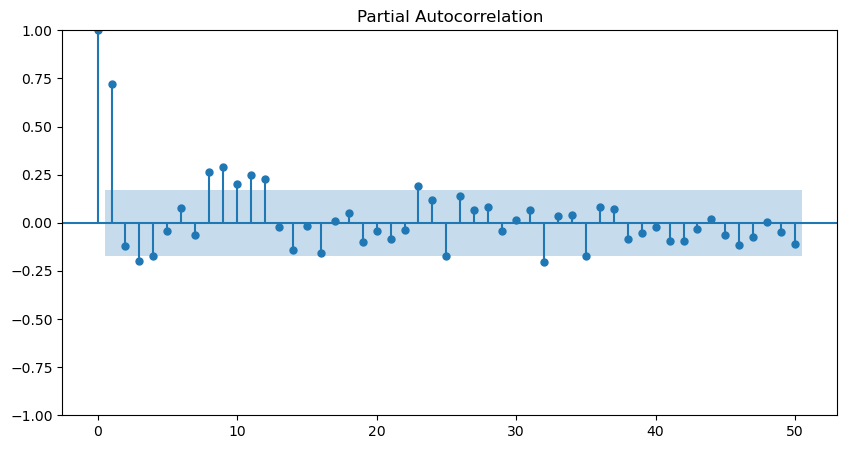

In [15]:
plot_pacf(df, lags = 50)

In [16]:
df.head()

,NO2
month,
2013-01-01,54.290323
2013-02-01,45.419355
2013-03-01,40.516129
2013-04-01,34.838710
2013-05-01,35.096774


In [17]:
df.shape

(130, 1)

In [18]:
df.isnull().sum()

NO2    0
dtype: int64

## SARIMA

In [19]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [20]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [21]:
%%time
rmse = []
order = []
for p, d, q in tqdm(parameters):
    try:
        modelo=ARIMA(y_train, order=(p, d, q)).fit()
        pred = modelo.predict(start=len(y_train), end=len(df) -1)
        error = np.sqrt(np.mean(mean_squared_error(y_test, pred)))
        rmse.append(error)
        order.append((p,d, q))
    except: 
        continue

  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_

 58%|█████▊    | 14/24 [00:00<00:00, 31.15it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packag

CPU times: total: 828 ms
Wall time: 1.16 s


In [22]:
# veamos los resultados de todos los modelos
results = pd.DataFrame({"RMSE": rmse, "order": order})
results.sort_values(by="RMSE", inplace=True)
results.head()

,RMSE,order
20,4.891410,"(3, 1, 2)"
19,7.180102,"(3, 1, 1)"
14,7.530622,"(2, 1, 2)"
18,7.699776,"(3, 1, 0)"
7,7.963030,"(1, 1, 1)"


In [23]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(4, 1, 5),  # modelo arima
               seasonal_order=(1, 1, 1, 12) # modelo sarima, estacionalidad es el ultimo
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

Error mae:  3.8616457438979466
CPU times: total: 78.1 ms
Wall time: 92.9 ms


C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,real,pred,error
2021-05-01,24.870968,23.778480,-1.092488
2021-06-01,24.548387,26.470626,1.922239
2021-07-01,28.612903,28.307402,-0.305501
2021-08-01,25.225806,24.925022,-0.300785
2021-09-01,30.838710,31.158949,0.320240
2021-10-01,39.483871,41.615487,2.131616
2021-11-01,38.000000,41.746858,3.746858
2021-12-01,41.580645,46.727935,5.147290
2022-01-01,45.322581,51.070292,5.747711
2022-02-01,40.741935,40.887437,0.145502


In [24]:
pred["real_test"] = y_test

In [25]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 12))
pred_año

,predicted_mean
2023-11-01,41.714739
2023-12-01,45.624630
2024-01-01,50.843189
2024-02-01,39.859622
2024-03-01,31.295219
2024-04-01,24.119255
2024-05-01,22.170403
2024-06-01,25.321923
2024-07-01,27.287225
2024-08-01,24.381926


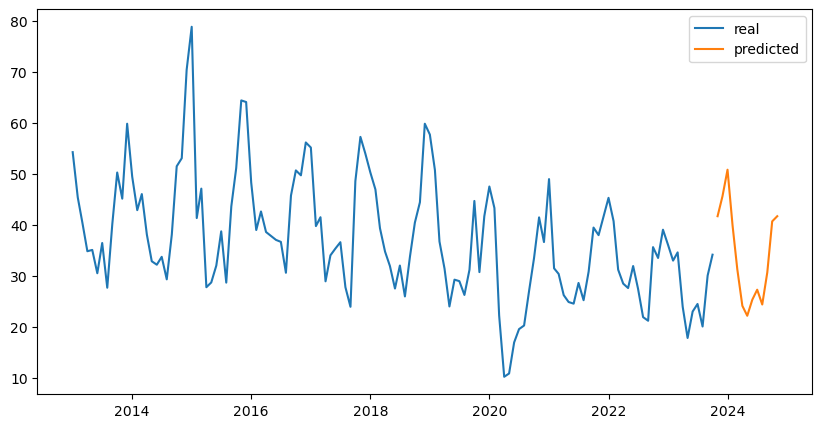

In [26]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [27]:
pred_año.mean()

predicted_mean    34.287324
dtype: float64

In [28]:
#Corrección primer valor de la predicción

# Obtener el valor de la fila '2023-11-01' y columna 'predicted_mean' en pred_año
valor_pred_año = pred_año.loc['2023-11-01', 'predicted_mean']

# Obtener el valor de la fila '2023-10-01' y columna 'NO2' en df
valor_df = df.loc['2023-10-01', 'NO2']

# Calcular la media entre los dos valores
media = (valor_pred_año + valor_df) / 2

# Sustituir el valor calculado en pred_año
pred_año.loc['2023-11-01', 'predicted_mean'] = media

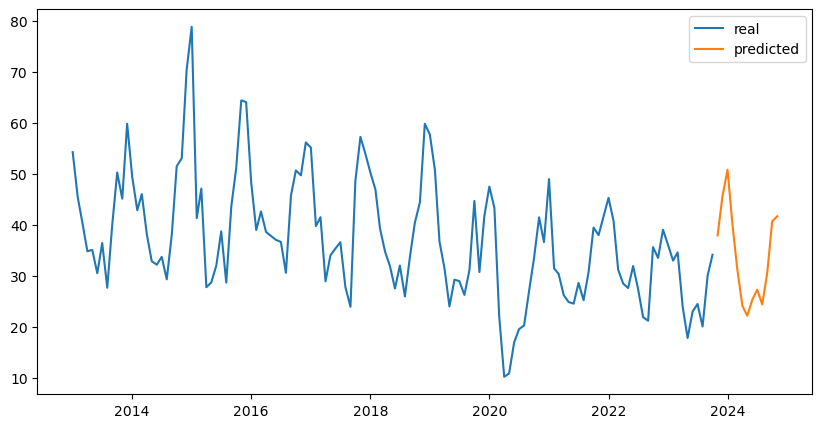

In [29]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [30]:
pred_año.mean()

predicted_mean    33.996807
dtype: float64